# DataExploration

- We know the data is very important in data science,but it is time-consuming.

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [144]:
df_train = pd.read_csv('../DATA/SalePrice_train.csv')

In [145]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [146]:
#help(df_train.columns)

## 1 What can we expect？

- In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

## 2 First: Analysing 'SalePrice'

- First, we need to see the 'SalePrice',because it is our reason
- Some data about 'SalePrice'

In [147]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- we can get distributing about SaleePrice

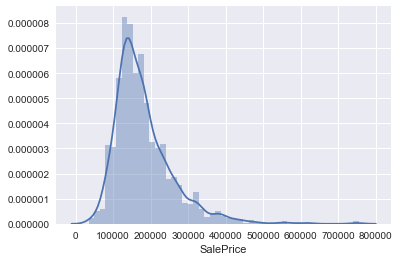

In [148]:
sns.distplot(df_train['SalePrice'])

- calculate Skewness(偏度) and Kurtosis(峰度)
    - 偏度Skewness(三阶) ——是统计数据分布偏斜方向和程度的度,三阶中心距除以标准差的三次方, 正态分布的偏度为0，偏度小于0为负偏度，位于均值左边的比右边的多，正偏度相反，上图为正偏度
       - 偏度为0表示其数据分布形态与正态分布的偏斜程度相同；偏度大于0表示其数据分布形态与正态分布相比为正偏或右偏，即有一条长尾巴拖在右边，数据右端有较多的极端值；偏度小于0表示其数据分布形态与正态分布相比为负偏或左偏，即有一条长尾拖在左边，数据左端有较多的极端值。偏度的绝对值数值越大表示其分布形态的偏斜程度越大。
    - 峰度Kurtosis (四阶) ——描述总体中所有取值分布形态陡缓程度的统计量, 概率密度在均值处峰值高低的特征，常定义四阶中心矩除以方差的平方，减去三；
        - 正态分布的峰度为3。以一般而言，正态分布为参照，峰度可以描述分布形态的陡缓程度，若bk<3，则称分布具有不足的峰度，若bk>3，则称分布具有过度的峰度。若知道分布有可能在峰度上偏离正态分布时，可用峰度来检验分布的正态性。在相同的标准差下，峰度系数越大，分布就有更多的极端值

In [149]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### 'SalePrice', her buddies and her interests 
- GrLinArea
- TotalBsmtSF

** Relationship with numerical variable **

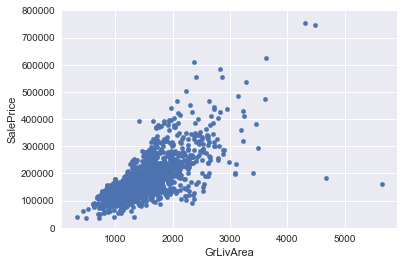

In [150]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));

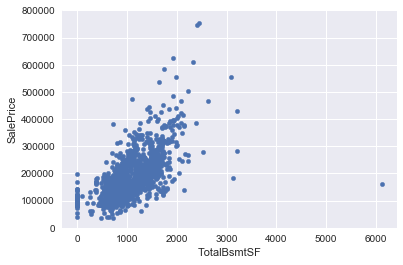

In [151]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));

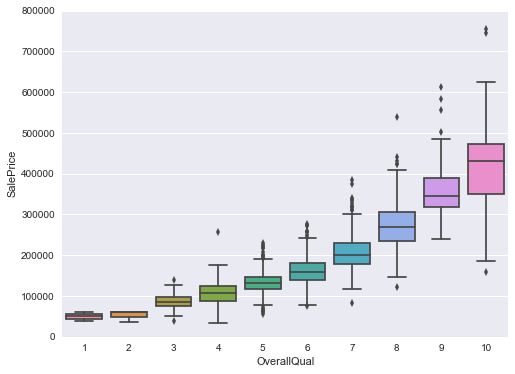

In [152]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

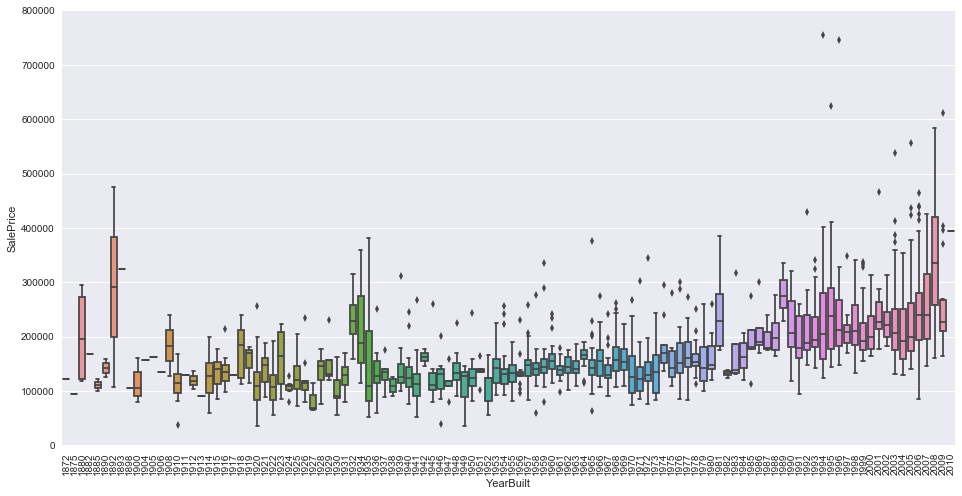

In [153]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

- feature selection and feature engineering can help us analysis data

## 3 Keep calm and work smart

Next, do a more objectve analysis

** Raw Data like soup **

- Raw data like soup, we know a little
- Using follow to analysis
    - Correlation matrix (heatmap style).
    - 'SalePrice' correlation matrix (zoomed heatmap style).
    - Scatter plots between the most correlated variables (move like Jagger style).

** Correlation matrix**

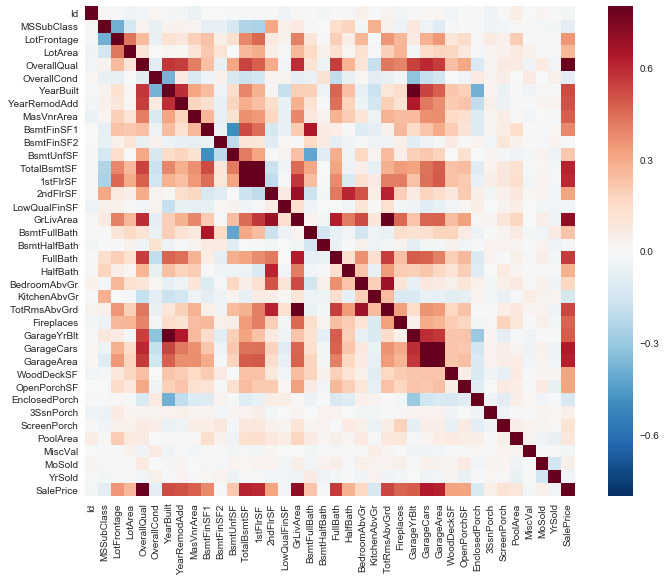

In [154]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

** SalePrice correlation matrix (zoomed heatmap style)** 

In [155]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)

In [156]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [157]:
cm

array([[ 1.        ,  0.7909816 ,  0.70862448,  0.6404092 ,  0.62343144,
         0.61358055,  0.60585218,  0.56066376,  0.53372316,  0.52289733],
       [ 0.7909816 ,  1.        ,  0.59300743,  0.60067072,  0.56202176,
         0.5378085 ,  0.47622383,  0.55059971,  0.42745234,  0.57232277],
       [ 0.70862448,  0.59300743,  1.        ,  0.46724742,  0.46899748,
         0.4548682 ,  0.56602397,  0.63001165,  0.82548937,  0.19900971],
       [ 0.6404092 ,  0.60067072,  0.46724742,  1.        ,  0.88247541,
         0.43458483,  0.43931681,  0.46967204,  0.36228857,  0.53785009],
       [ 0.62343144,  0.56202176,  0.46899748,  0.88247541,  1.        ,
         0.48666546,  0.48978165,  0.40565621,  0.33782212,  0.47895382],
       [ 0.61358055,  0.5378085 ,  0.4548682 ,  0.43458483,  0.48666546,
         1.        ,  0.81952998,  0.32372241,  0.28557256,  0.391452  ],
       [ 0.60585218,  0.47622383,  0.56602397,  0.43931681,  0.48978165,
         0.81952998,  1.        ,  0.38063749

In [158]:
#help(corrmat.nlargest)

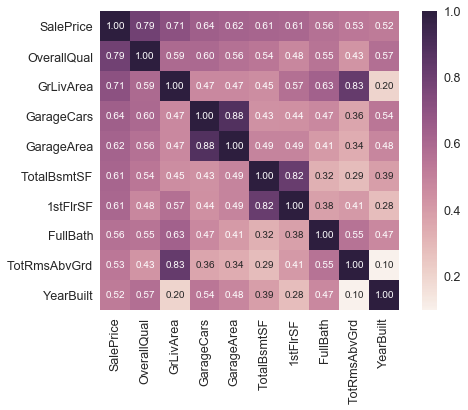

In [159]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

根据上图，我们可以看出

- 'OverallQual'，'GrLivArea'和'TotalBsmtSF'与'SalePrice'强相关。之前我们分析过
- “GarageCars”和“GarageArea”也是一些最相关的变量。但是，正如我们在最后一点所讨论的那样，适合车库的车辆数量是车库面积的结果。 “GarageCars”和“GarageArea”就像孪生兄弟。你永远无法区分它们。因此，在我们的分析中，我们只需要其中的一个变量（我们可以保留“GarageCars”，因为它与“SalePrice”的关联性更高）
- “TotalBsmtSF”和“1stFloor”似乎也是双胞胎兄弟。我们可以保留“TotalBsmtSF”只是说我们的第一个猜测是正确的
- FullBath？不确定
- “TotRmsAbvGrd”和“GrLivArea”？
- “YearBuilt”似乎与“SalePrice”略有关联。


** Scatter plots between 'SalePrice' and correlated variables (move like Jagger style) **

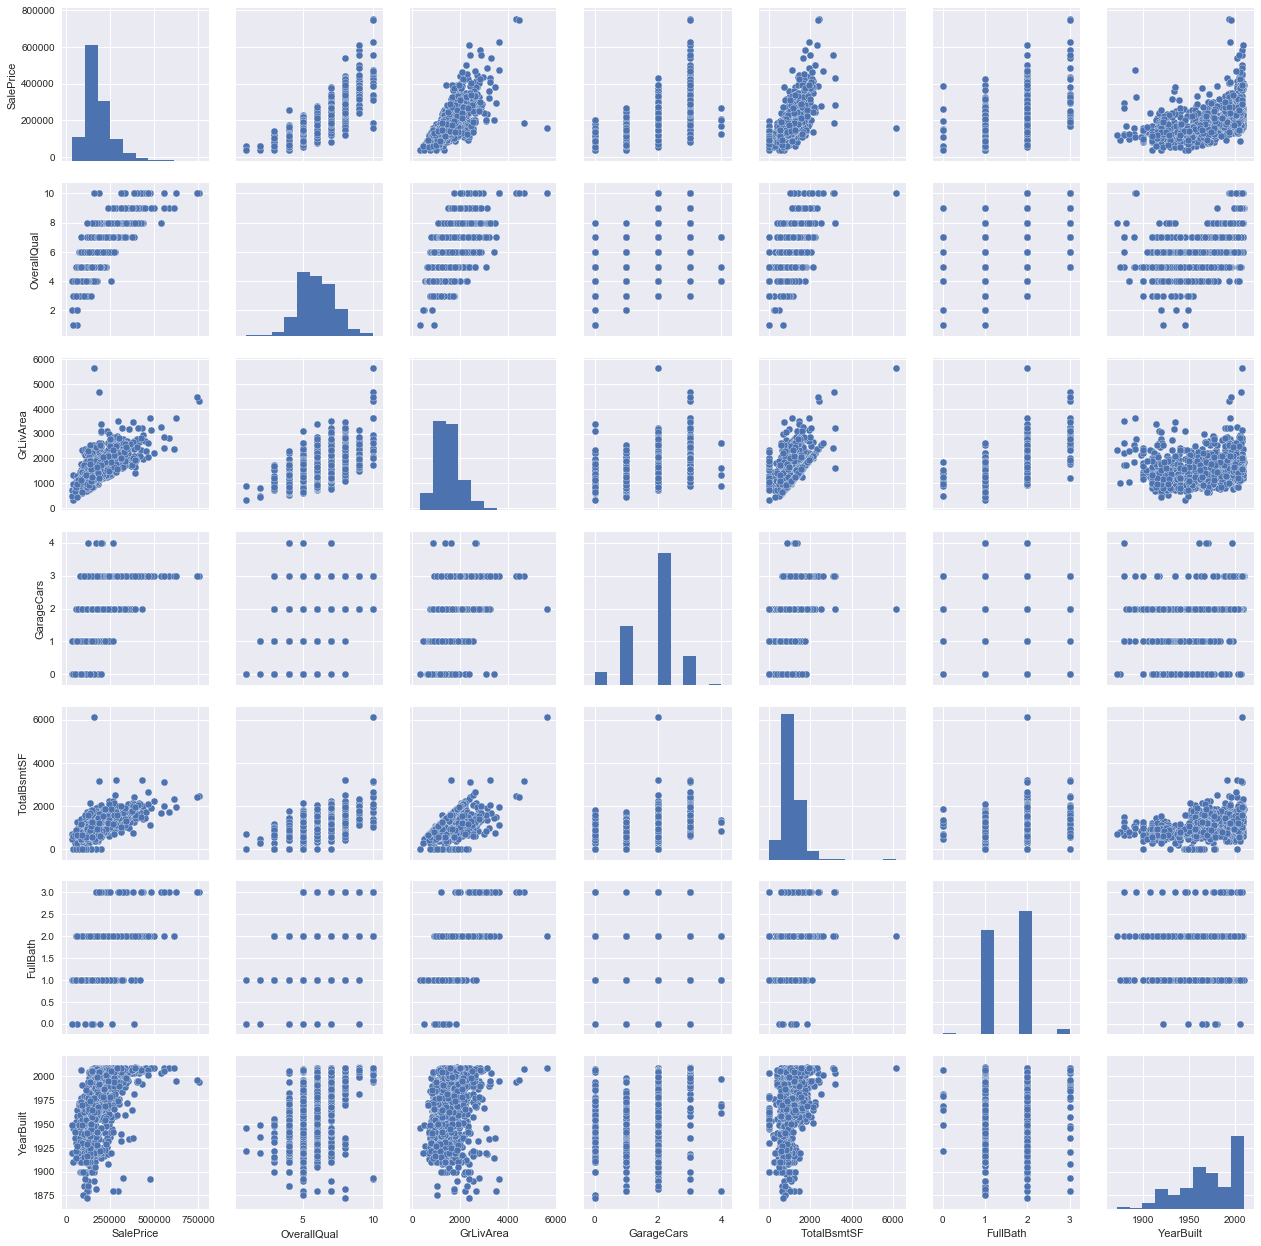

In [160]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

## 4 Missing Data

Important questions when thinking about missing data:
- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

In [161]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis= 1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


- 当超过15%的数据丢失时，应该删除相应的变量
- 可以看到GarageX有相同的数据量缺失，所以缺少的数据肯定是指同一组观察值，由于GarageCars表示了关于车库的最重要信息，所以我们可以删除这几个有5%缺失的变量
- BsmtX也可以这样删除
- MasVnrArea和MasVnrTypeu与Yearbuilt和OverallQual有很强的相关性，所以亦可以删除
- 对于Electrical只有一个缺失数据，可以删除这次记录不用删除变量

In [162]:
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [163]:
df_train.isnull().sum().max()

0

### Outliars!

- Outliars can effect our model

** Univariate analysis**

- Data standardize
- converting data values to have mean of 0 and a standard deviation of 1.

In [164]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

In [165]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ..., 
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [166]:
saleprice_scaled[:,0].argsort()#argsort函数返回的是数组值从小到大的索引值

array([ 495,  916,  968, ..., 1169, 1182,  691], dtype=int64)

In [167]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [168]:
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


** Bivariate analysis **

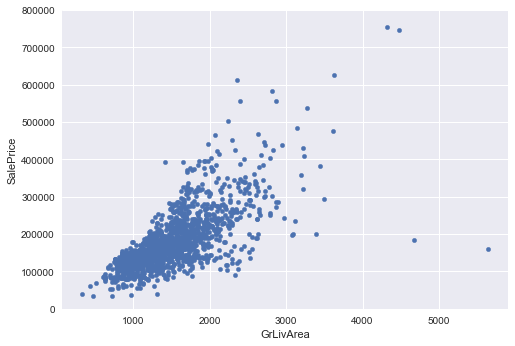

In [169]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- Two values is outliars

In [170]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [171]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [172]:
df_train;

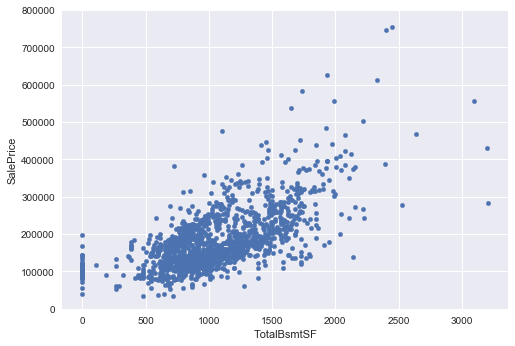

In [173]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## 5 Getting hard core

It's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

Four assumptions should be tested:
- Normality
- Homoscedasticity
- Linearit
- Absence of correlated errors

** In the search for normality **

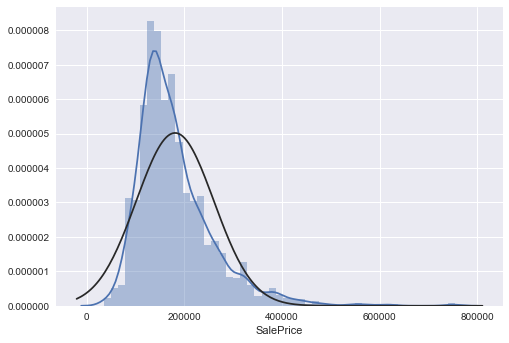

In [174]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);


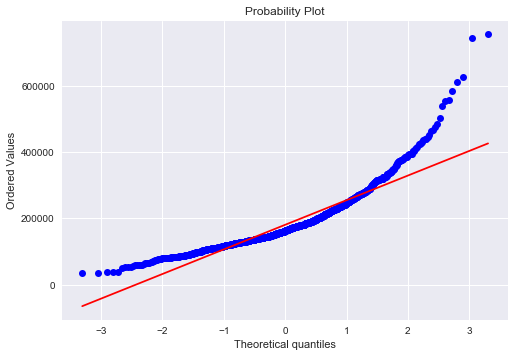

In [175]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

> It is a positive skewness,log transformations usually works well

In [176]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

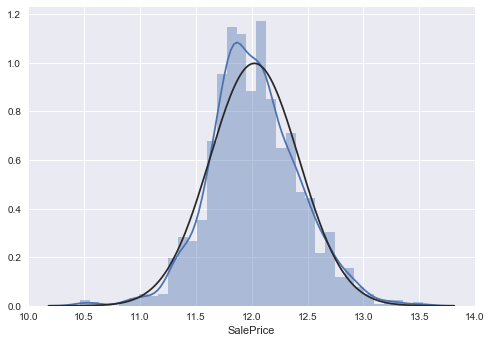

In [177]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit = norm)

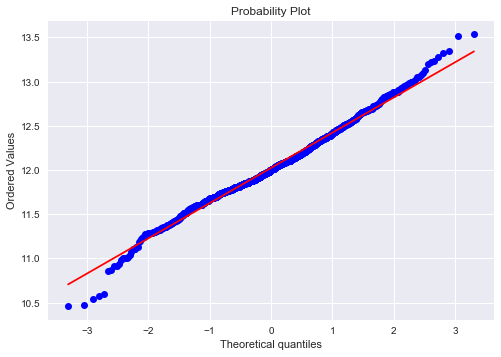

In [178]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

Let's check 'GrLivArea'

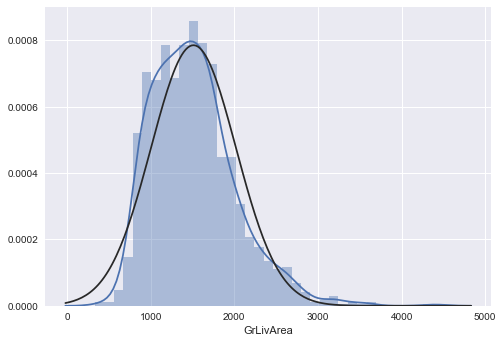

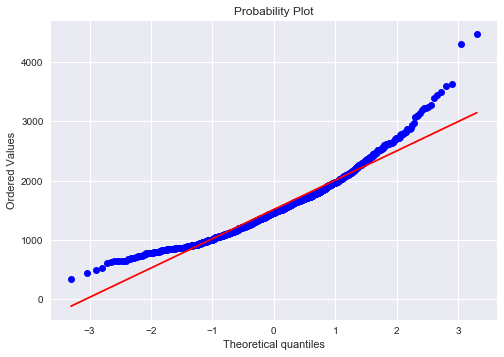

In [179]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [180]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

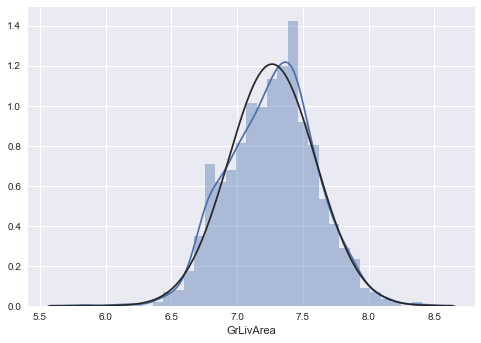

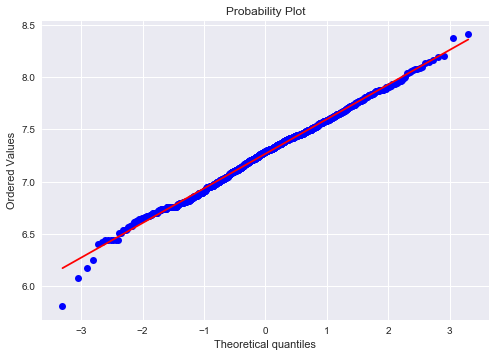

In [181]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next, TotalBsmtSF

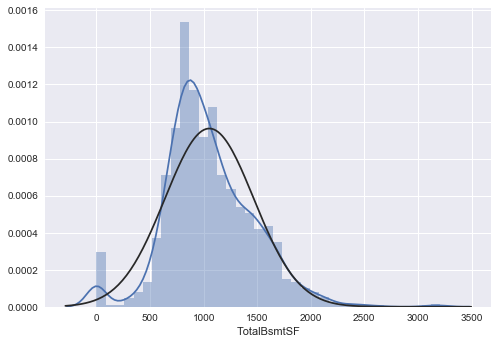

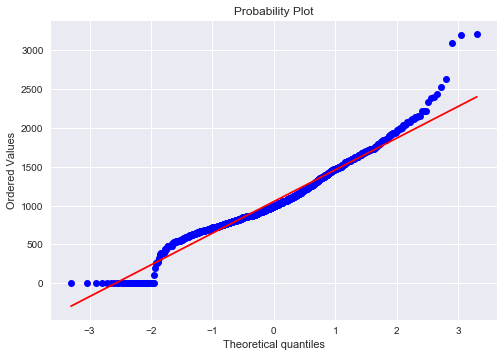

In [182]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

- something that, in general, presents skewness
- A big problem because the value zero doesn't allow us to do log transformations.
- A significant number of observations with value zero 
> To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.


In [183]:
#create column for new variable (one is enough because it's a binary categorical feature)

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)

In [184]:
#help(pd.Series)

In [185]:
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [186]:
#help(df_train.loc)

In [187]:
df_train['HasBsmt'];

In [188]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

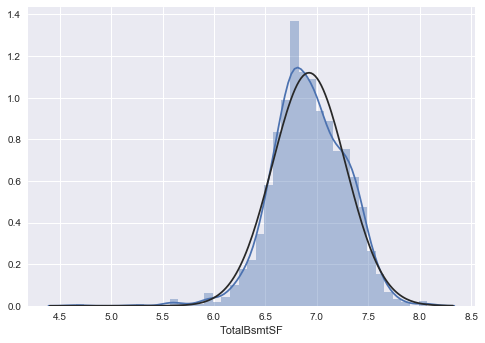

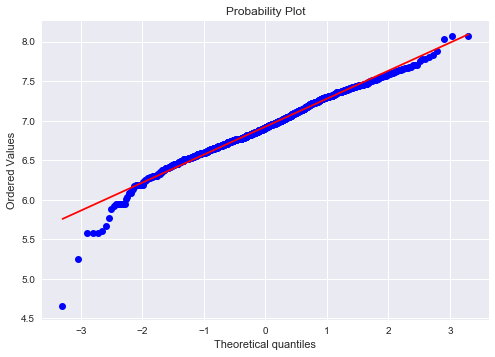

In [189]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

** In the search for writing 'homoscedasticity' right at the first attempt
 **

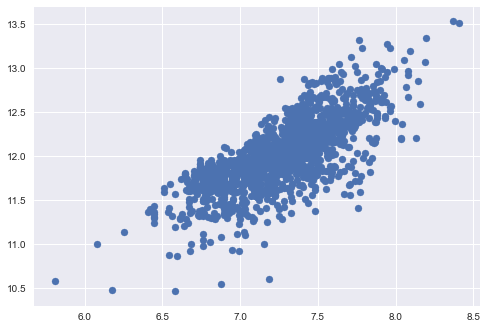

In [190]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

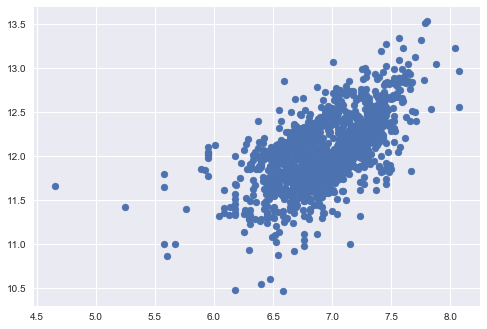

In [191]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [192]:
df_train;

** Last but not the least, dummy variables **

In [193]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [194]:
df_train;

In [195]:
df_train.values

array([[  1.00000000e+00,   6.00000000e+01,   8.45000000e+03, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  2.00000000e+00,   2.00000000e+01,   9.60000000e+03, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  3.00000000e+00,   6.00000000e+01,   1.12500000e+04, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.45800000e+03,   7.00000000e+01,   9.04200000e+03, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.45900000e+03,   2.00000000e+01,   9.71700000e+03, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.46000000e+03,   2.00000000e+01,   9.93700000e+03, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]])

## Modelling

In [196]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [200]:
y_train = df_train['SalePrice'].values
y_train
df_train.drop(['SalePrice'], axis=1, inplace=True)

In [202]:
df_train.drop(['Id'], axis=1, inplace=True)

** Define a cross validation strategy **

We use the cross_val_score function of Sklearn

In [203]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, df_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

** Base Models **

- LASSO Regression :    
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [205]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- Elastic Net Regression :   
again made robust to outliers

In [206]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- Kernel Ridge Regression :

In [207]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- Gradient Boosting Regression :  
With huber loss that makes it robust to outliers

In [208]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

- XGBoost :

In [209]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

- LightGBM :

In [210]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

** Base models scores **

In [211]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1116 (0.0066)



In [212]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0067)



In [217]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.7305 (0.4263)



In [214]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1166 (0.0088)



In [215]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1159 (0.0061)



In [216]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1159 (0.0072)

